In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
import multiprocessing
from functools import partial
from PIL import Image
import numbergen as ng
import imagen as ig
from skimage.transform import resize

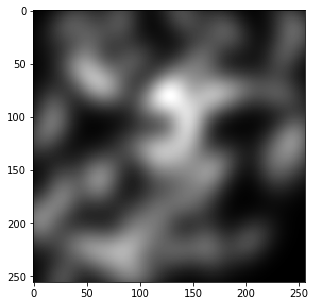

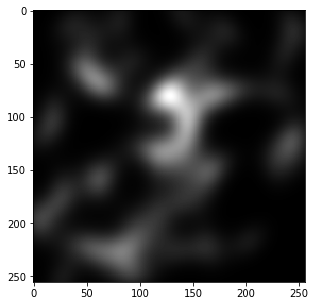

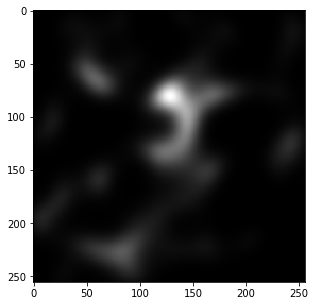

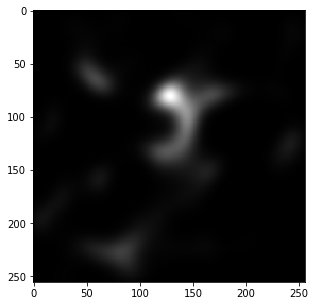

In [121]:
def random_pattern(power=3):
    gs = ig.Composite(operator=np.add,
                  generators=[ig.Gaussian(size=0.1,
                                          scale=0.02,
                                          x=ng.UniformRandom(seed=i+1)-0.5,
                                          y=ng.UniformRandom(seed=i+2)-0.5,
                                          orientation=np.pi*ng.UniformRandom(seed=i+3),
                                          aspect_ratio=1.0/0.71) for i in range(50)])
    ret = gs()
    ret = np.power(ret, power)
    ret = ret/np.max(ret) * 3.0
    
    return ret

def show_random_pattern(pattern):
    plt.figure(figsize=(10,5))
    plt.imshow(pattern, cmap='gray')
    plt.show()
    
for i in range(4):
    pattern = random_pattern(i+1)
    show_random_pattern(pattern)

In [123]:
from ssn.random_pattern import random_pattern

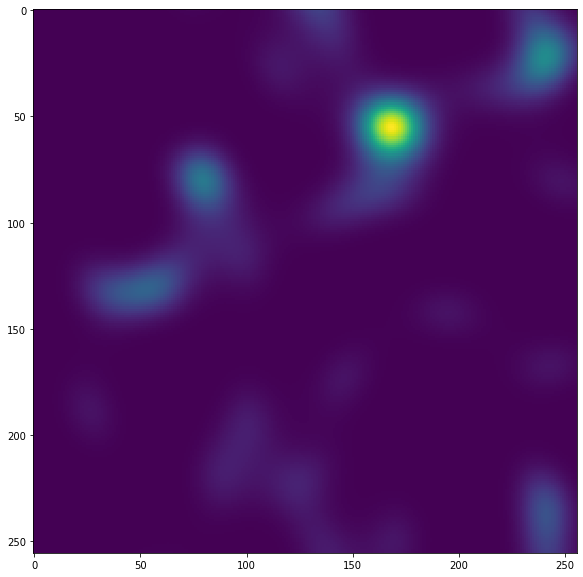

In [125]:
pattern_generator = random_pattern()

pattern generation took: 2.9319827556610107s


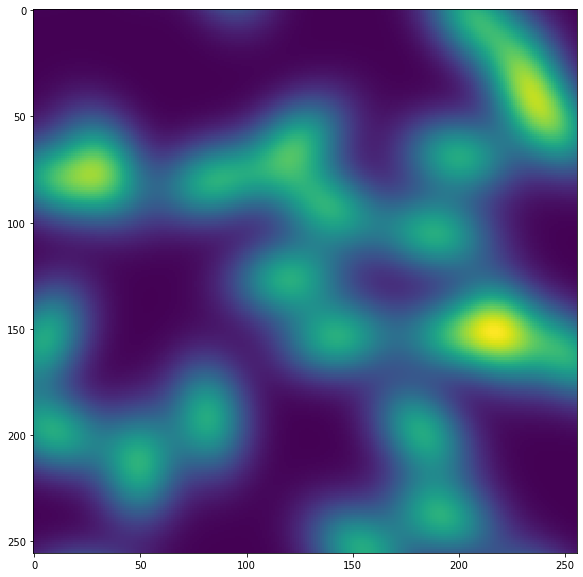

In [129]:
s = time.time()
pattern_list = []
for i in range(51):
    pattern = pattern_generator.get_pattern(num=i)
    print('pattern generation took: {}s'.format(time.time() - s))
    pattern_list.append(pattern)


plt.figure(figsize=(15,10))
plt.imshow(pattern)
plt.show()